https://towardsdatascience.com/twitter-location-analysis-c488c967a41f

https://datascienceparichay.com/article/get-data-from-twitter-api-in-python-step-by-step-guide/

https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [2]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# import tweepy
import tweepy as tw

# your Twitter API key and API secret
my_api_key = ""
my_api_secret = ""

# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)


In [5]:

# Define the search term and the date_since date as variables
search_query1 = "corona"
search_query2 = "coronavirus"
search_query3 = "covid"
search_query4 = "covid19"

In [6]:
# get tweets from the API
tweets = tw.Cursor(api.search_tweets,
                   geocode="-31.3096000,18.3570000,500km",
              q=search_query1 or search_query2 or search_query3 or search_query4,
              lang="en",
              since="2021-11-29").items(500)




# tweepy.Cursor(api.search, q='cricket', geocode="-22.9122,-43.2302,1km").items(10)

# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


Total Tweets fetched: 369


In [8]:
import pandas as pd

# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
tweets_df.head()

user_name  user_location  \
0         PapiChulo   South Africa   
1  Innocent Seilane   South Africa   
2            Panuel   South Africa   
3            Eunice  Koffiefontein   
4          L.A Rawk        The 011   

                                    user_description  user_verified  \
0  “At the end of the day,the day ends… Start aga...          False   
1                                Foodie and Beardie.          False   
2  The problem with achieving success is believin...          False   
3                                                             False   
4        •MAN UNITED •OPFC • SUPERDAD\n•COUCH PUNDIT          False   

                       date  \
0 2021-12-05 13:36:37+00:00   
1 2021-12-05 13:20:37+00:00   
2 2021-12-05 13:12:15+00:00   
3 2021-12-05 12:54:27+00:00   
4 2021-12-05 12:05:16+00:00   

                                                text hashtags  \
0  Even for i 6 ye Corona Extra 🤦🏼‍♂️ https://t.c...     None   
1  @_imadeyoufamous @thacleodon @danielmarven Cla...     None   
2  @MphozaKB 🤣 🤣 I'm just sticking to my choice.....     None   
3                             What if it's Corona. 😬     None   
4  @Tk_Cele 🤤 All you need after this is a ice co...     None   

                source  
0   Twitter for iPhone  
1  Twitter for Android  
2  Twitter for Android  
3  Twitter for Android  
4  Twitter for Android

In [9]:
tweets_df.tail()

user_name user_location  \
364  Mr Handsome ____________________________.  South Africa   
365  Mr Handsome ____________________________.  South Africa   
366  Mr Handsome ____________________________.  South Africa   
367  Mr Handsome ____________________________.  South Africa   
368  Mr Handsome ____________________________.  South Africa   

                                      user_description  user_verified  \
364  Tembu by birth || Youtuber: Nyebe Official || ...          False   
365  Tembu by birth || Youtuber: Nyebe Official || ...          False   
366  Tembu by birth || Youtuber: Nyebe Official || ...          False   
367  Tembu by birth || Youtuber: Nyebe Official || ...          False   
368  Tembu by birth || Youtuber: Nyebe Official || ...          False   

                         date  \
364 2021-11-29 02:52:08+00:00   
365 2021-11-29 02:51:51+00:00   
366 2021-11-29 01:10:41+00:00   
367 2021-11-29 01:10:28+00:00   
368 2021-11-29 01:09:35+00:00   

                                                  text  \
364  South African Omicron Corona Virus Strain. Pre...   
365  South African Omicron Corona Virus Strain. Pre...   
366  South African Omicron Corona Virus Strain. Pre...   
367  South African Omicron Corona Virus Strain. Pre...   
368  President Ramaphosa Full Speech on South Afric...   

                   hashtags               source  
364              [EmmaRose]  Twitter for Android  
365            [BTS_PTD_LA]  Twitter for Android  
366              [umkhokha]  Twitter for Android  
367                  [MUFC]  Twitter for Android  
368  [mandatoryvaccination]  Twitter for Android

In [10]:

#Removing RT, Punctuation etc
# remove_rt = lambda x: re.sub('RT @\w+: ',"",x)
# rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
# tweets_df["text"] = tweets_df.text.map(remove_rt).map(rt)
# tweets_df["text"] = tweets_df.text.str.lower()
# tweets_df.head(10)

In [11]:
#Calculating Negative, Positive, Neutral and Compound values
tweets_df[['polarity', 'subjectivity']] = tweets_df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets_df['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweets_df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweets_df.loc[index, 'sentiment'] = "positive"
    else:
        tweets_df.loc[index, 'sentiment'] = "neutral"
        tweets_df.loc[index, 'neg'] = neg
        tweets_df.loc[index, 'neu'] = neu
        tweets_df.loc[index, 'pos'] = pos
        tweets_df.loc[index, 'compound'] = comp
tweets_df.head(10)

user_name           user_location  \
0         PapiChulo            South Africa   
1  Innocent Seilane            South Africa   
2            Panuel            South Africa   
3            Eunice           Koffiefontein   
4          L.A Rawk                 The 011   
5           E. P. K        South Africa🇿🇦🇬🇷   
6                B🌻            South Africa   
7       Mike Frobus  Cape Town South Africa   
8        Sahil Lala            South Africa   
9    Sir knows best            South Africa   

                                    user_description  user_verified  \
0  “At the end of the day,the day ends… Start aga...          False   
1                                Foodie and Beardie.          False   
2  The problem with achieving success is believin...          False   
3                                                             False   
4        •MAN UNITED •OPFC • SUPERDAD\n•COUCH PUNDIT          False   
5           Say it like it is..\nΜαλακά θεν είμαι...          False   
6  ⚒• Nature •Mental Health • Lover. 👩‍👧‍👦 . Work...          False   
7           Tax, Annuity &  Risk Solution Consulants          False   
8  Gaming and Photography~ Ex-G3AR Editor. Freela...          False   
9  A man far from nature has a hard life-Principl...          False   

                       date  \
0 2021-12-05 13:36:37+00:00   
1 2021-12-05 13:20:37+00:00   
2 2021-12-05 13:12:15+00:00   
3 2021-12-05 12:54:27+00:00   
4 2021-12-05 12:05:16+00:00   
5 2021-12-05 11:23:49+00:00   
6 2021-12-05 11:15:30+00:00   
7 2021-12-05 10:38:50+00:00   
8 2021-12-05 10:38:16+00:00   
9 2021-12-05 09:22:43+00:00   

                                                text hashtags  \
0  Even for i 6 ye Corona Extra 🤦🏼‍♂️ https://t.c...     None   
1  @_imadeyoufamous @thacleodon @danielmarven Cla...     None   
2  @MphozaKB 🤣 🤣 I'm just sticking to my choice.....     None   
3                             What if it's Corona. 😬     None   
4  @Tk_Cele 🤤 All you need after this is a ice co...     None   
5  @alfred_cabonena Ja majority of my unvaxxed fr...     None   
6  @_Thattoo That’s why corona is the beverage of...     None   
7  Howard Steen - Setting up a website to collect...     None   
8  @konstantly_Rae Your test might have been in t...     None   
9  @MLKeegan @marvin_H96 @Lolo_Monareng @Abramjee...     None   

                source  polarity  subjectivity sentiment  neg  neu  pos  \
0   Twitter for iPhone  0.000000      0.100000   neutral  0.0  1.0  0.0   
1  Twitter for Android  0.260000      0.260000  negative  NaN  NaN  NaN   
2  Twitter for Android -0.050000      0.500000  negative  NaN  NaN  NaN   
3  Twitter for Android  0.000000      0.000000   neutral  0.0  1.0  0.0   
4  Twitter for Android -0.600000      1.000000   neutral  0.0  1.0  0.0   
5      Twitter Web App  0.333333      0.500000  positive  NaN  NaN  NaN   
6   Twitter for iPhone -0.250000      0.500000  negative  NaN  NaN  NaN   
7      Twitter Web App  0.000000      0.000000  negative  NaN  NaN  NaN   
8      Twitter Web App  0.006818      0.336364  positive  NaN  NaN  NaN   
9  Twitter for Android -0.017143      0.453333  negative  NaN  NaN  NaN   

   compound  
0       0.0  
1       NaN  
2       NaN  
3       0.0  
4       0.0  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN

In [12]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tweets_df_negative = tweets_df[tweets_df["sentiment"]=="negative"]
tweets_df_positive = tweets_df[tweets_df["sentiment"]=="positive"]
tweets_df_neutral = tweets_df[tweets_df["sentiment"]=="neutral"]

In [13]:
def count_values_in_column(data,feature):
     total=data.loc[:,feature].value_counts(dropna=False)
     percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
     return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tweets_df,"sentiment")

Total  Percentage
negative    175       47.43
positive    116       31.44
neutral      78       21.14

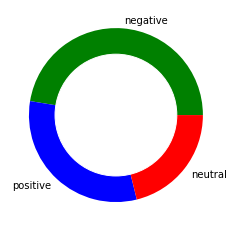

In [14]:
# create data for Pie Chart
pichart = count_values_in_column(tweets_df,"sentiment")
names = pichart.index
size=pichart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [15]:
#Function to Create Wordcloud
def create_wordcloud(text):
     mask = np.array(Image.open("cloud.jpg"))
     stopwords = set(STOPWORDS)
     wc = WordCloud(background_color="white",
     mask = mask,
     max_words=3000,
     stopwords=stopwords,
     repeat=True)
     wc.generate(str(text))
     wc.to_file("wc.png")
     print("Word Cloud Saved Successfully")
     path="wc.png"
     display(Image.open(path))

Word Cloud Saved Successfully


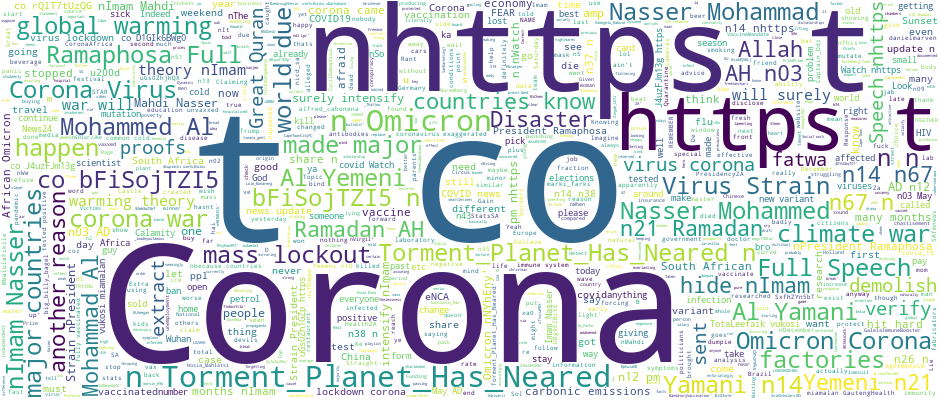

In [16]:
#Creating wordcloud for all tweets
create_wordcloud(tweets_df["text"].values)

Word Cloud Saved Successfully


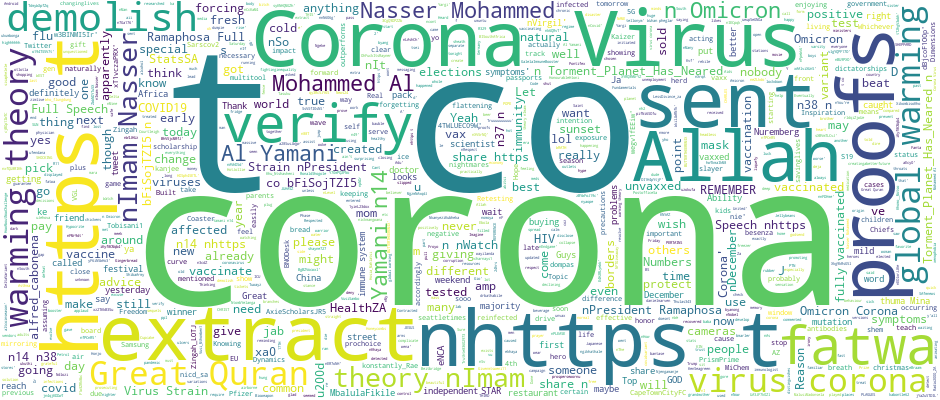

In [17]:
#Creating wordcloud for positive sentiment
create_wordcloud(tweets_df_positive["text"].values)

Word Cloud Saved Successfully


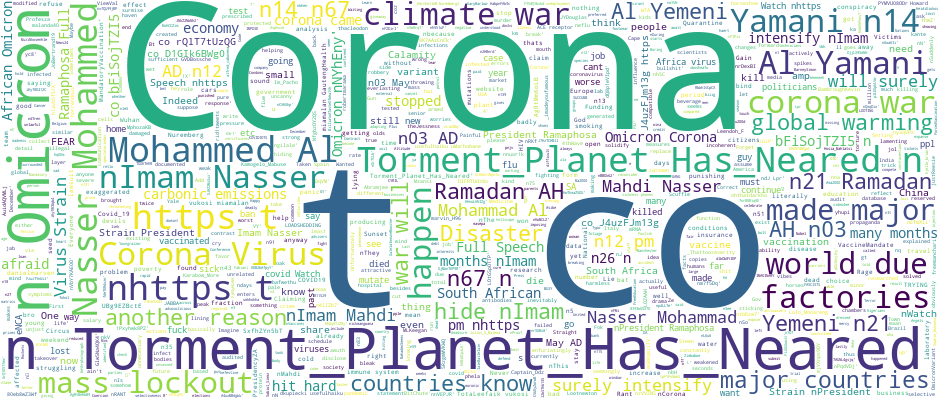

In [18]:
#Creating wordcloud for negative sentiment
create_wordcloud(tweets_df_negative["text"].values)